In [21]:
class env():
    def __init__(self,ls):
        self.seq = ls
        self.ac = -1
        self.len = len(self.seq)
        self.is_three = False
        self.nA = 3
    def walk(self,action=1):
        done =False
        try:
            prev_ac = self.ac
            self.ac += action
            reward = action*self.seq[self.ac]
            state = self.seq[self.ac]
            current_index = self.seq.index(state)
        except : 
            state = self.seq[prev_ac]
            self.ac = prev_ac
            reward = -20
            current_index = self.seq.index(state)
        
        if self.is_three and action == 3:
            state = self.seq[prev_ac]
            self.ac = prev_ac
            reward = -20
            current_index = self.seq.index(state)
            
        if action == 3:
            self.is_three =True
        if self.len-1== current_index:
            done =True
        yield state,reward,current_index,done
    def reset(self):
        self.seq = ls
        self.ac = -1
        self.is_three = False
        return 0

In [2]:
import numpy as np

In [3]:
def generating_episodes(env,Q,i):
    episode = []
    state = env.reset()
    is_three = False
    current_index = 0
    while True:
        action= get_action(Q[state],i)
        new_state,reward,current_index,done=list(hopping_stone.walk(action))[0] 
        episode.append((state,reward,current_index,action))
        state = new_state
        if done :
            break
    return episode
        

In [4]:
def get_action(Q,i):
    epsilon = 1.0/i    
    action_space = (np.zeros(3)+1)*epsilon/3
    action_space[np.argmax(Q)] = 1 - epsilon + epsilon/3
    action = np.random.choice(np.arange(3)+1,p=action_space)
    return action
        
        
    

In [29]:
np.arange(3)+1

array([1, 2, 3])

In [5]:
import sys
def mc_prediction_q(env, num_episodes, generate_episode, gamma=1.0):
    # initialize empty dictionaries of arrays
    returns_sum = defaultdict(lambda: np.zeros(3))
    N = defaultdict(lambda: np.zeros(3))
    Q = defaultdict(lambda: np.zeros(3))
    
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        ## TODO: complete the function
        temp_list = []
        episode= generating_episodes(env,Q,i_episode)
        for i,exp_tuple in enumerate(episode):
            ## state,reward,current_index,action
            state,_,_,action = exp_tuple
            N[state][action-1] += 1.0 
            for j,exp_tuple2 in enumerate(episode[i:]):
                _,reward,_,_ = exp_tuple2
                ## makes sure it's a single visit.
                if (state,action) not in temp_list:
                    returns_sum[state][action-1] += reward * (gamma ** j)
            Q[state][action-1] = returns_sum[state][action-1]/ N[state][action-1]
            temp_list.append((state,action))         
        
    return Q

In [11]:
from collections import defaultdict
#ls= [13,26,90,12,5,20]
ls = [5,4,3,3,1]
hopping_stone = env(ls)
Q= mc_prediction_q(hopping_stone, 20000, generating_episodes)

Episode 20000/20000.

In [12]:
Q

defaultdict(<function __main__.mc_prediction_q.<locals>.<lambda>()>,
            {0: array([ 2.85714286, 14.93916958,  5.66666667]),
             3: array([  1.9974396 ,  -6.23076923, -17.85714286]),
             5: array([  9.4, -12. , -50. ]),
             4: array([6.99229482, 0.        , 3.        ])})

In [14]:
#ls= [13,26,90,12,5,20]
ls = [5,4,3,2,1]
hopping_stone = env(ls)
action = np.argmax(Q[0])+1
r = 0
while True:
    new_state,reward,current_index,done=list(hopping_stone.walk(action))[0]
    r += reward
    action = np.argmax(Q[new_state])+1
    if done :
        break
print(r)

14


In [162]:
90*3 + 12*1 +  20*2

322

In [200]:
index = [(i,(np.argmax(Q[i])+1)) for i in ls]
print(index)
ls=[0]+ [13,26,90,12,5,20]

[(13, 1), (26, 1), (90, 1), (12, 2), (5, 1), (20, 1)]


In [201]:
index = [(np.argmax(Q[i])+1) for i in ls]
ins = np.argmax(Q[0])+1
k = ins
r = []
t = 0 
while True:
    if t != 0:
        ins += k
    r.append(k*ls[ins])
    k = np.argmax(Q[ls[ins]])+1
    t =1
    if ins == len(ls)-1:
        break
    
print(sum(r))    

322


In [216]:
Q

defaultdict(<function __main__.mc_prediction_q.<locals>.<lambda>()>,
            {0: array([  0.        , 176.04433498, 321.99870738]),
             26: array([141.87341772,  61.44444444,   0.        ]),
             12: array([22.5, 40. , 20. ]),
             5: array([20.,  0.,  0.]),
             90: array([51.9991496, 30.       , 32.       ]),
             13: array([0., 0., 0.]),
             20: array([0., 0., 0.])})

In [245]:
ls= [13,26,90,12,5,20]
hopping_stone = env(ls)
action = np.argmax(Q[0])+1
r = 0
while True:
    new_state,reward,current_index,done=list(hopping_stone.walk(action))[0]
    r += reward
    action = np.argmax(Q[new_state])+1
    if done :
        break
print(r)

322


In [68]:
from collections import defaultdict
Q = defaultdict(lambda:np.zero(5))
for i in range(5):
    print(generating_episodes(hopping_stone,Q))

[(0, 57, 2, 3), (19, 12, 3, 1), (12, 5, 4, 1), (5, 20, 5, 1)]
[(0, 57, 2, 3), (19, 12, 3, 1), (12, 5, 4, 1), (5, 20, 5, 1)]
[(0, 13, 0, 1), (13, 26, 1, 1), (26, 15, 4, 3), (5, -20, 4, 3), (5, -20, 4, 2), (5, 20, 5, 1)]
[(0, 52, 1, 2), (26, 15, 4, 3), (5, -20, 4, 3), (5, 20, 5, 1)]
[(0, 52, 1, 2), (26, 15, 4, 3), (5, -20, 4, 3), (5, 20, 5, 1)]


In [16]:

temp = {}
matrix = np.array([[1,2,3],[2,3,4],[3,4,1]])
print(matrix)
flag=0
nrow ,ncol = matrix.shape
for i in range(nrow):
    for j in range(ncol):
        #print(matrix[i][j])
        if i+j != ncol and i+j != 0:
            if i+j not in temp.keys():
                temp[i+j] = [matrix[i][j]]
            else :
                if temp[i+j][-1] != matrix[i][j]:
                    print("\nNot the required matrix!!")
                    flag = 1
                    break
if flag == 0: print("Hankle matrix") 

[[1 2 3]
 [2 3 4]
 [3 4 1]]
Hankle matrix


In [71]:
np.array(matrix)

array([[1, 2, 3],
       [2, 3, 5]])

In [68]:
temp

{1: [2, 2], 2: [3, 3]}

In [100]:
26*2 + 19 +20*3

131

In [210]:
np.array([[1,2,3],[2,3,4],[3,4,1]])

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 1]])

In [30]:
import matplotlib.pyplot as plt

## Sarsamax

In [106]:
# def generate_episodes(env,Q,i):
#     state = env.reset()
#     action = get_action(env,Q,state,i)
#     episode = []
#     ##for ii in range(700):
#     while True:
#         next_state,reward,done,prob=env.walk(action)
#         next_action = get_action(env,Q,next_state,i)
#         episode.append((state,action,next_state,next_action,reward))
#         state = next_state
#         action = next_action
#         if done:
#             break
#     return episode


def generating_episodes(env,Q,i):
    episode = []
    state = env.reset()
    is_three = False
    current_index = 0
    action= get_action(Q[state],i)
    while True:
        new_state,reward,current_index,done=list(hopping_stone.walk(action))[0]
        next_action= get_action(Q[new_state],i)
        #episode.append((state,reward,current_index,action,new_state,next_action))
        episode.append((state,action,new_state,next_action,reward))
        state = new_state
        action = next_action
        if done :
            break
    return episode

# def get_action(env,Q,state,i):
# #     nA = 3
# #     epsilon = 1.0/i
# #     probs = epsilon*(np.ones(nA))/nA
# #     probs[np.argmax(Q[state])]+= 1-epsilon
# #     return np.random.choice(np.arange(nA),p=probs)

def get_action(Q,i):
    epsilon = 1.0/i  
    if i < 1500:
        epsilon = 0.8
    #epsilon = 1.0/i    
    action_space = (np.zeros(3)+1)*epsilon/3
    action_space[np.argmax(Q)] = 1 - epsilon + epsilon/3
    action = np.random.choice(np.arange(3)+1,p=action_space)
    return action



def q_learning(env, num_episodes, alpha, gamma=1.0):
    # initialize action-value function (empty dictionary of arrays)
    Q = defaultdict(lambda: np.zeros(env.nA))
    # initialize performance monitor
    # loop over episodes
    tmp = []
    for i_episode in range(1, num_episodes+1):


        if i_episode == 1:
            scores =[]
        # monitor progress
        if i_episode % 100 == 0:
            if scores:
                tmp.append(np.mean(scores))
                #print(tmp)
            scores = []
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            #print(episode)
            sys.stdout.flush()   

        ## TODO: complete the function
        episode = generating_episodes(env,Q,i_episode)
        counter = 0
        #print(episode)
        for j,(state,action,next_state,next_action,reward) in enumerate(episode):
            #print(action,next_action)
            counter += reward
            Q[state][action-1] +=  alpha * (reward + (gamma**j) * Q[next_state][np.argmax(Q[next_state])] - Q[state][action-1])
        scores.append(counter)    
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(tmp),endpoint=False),np.asarray(tmp))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % 100)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % 100), np.max(tmp))

    return Q


Episode 20000/20000

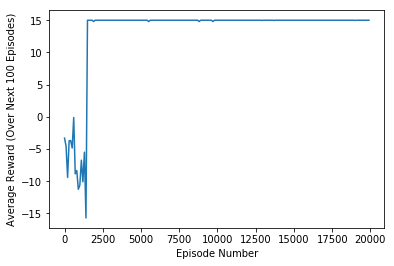

Best Average Reward over 100 Episodes:  15.0


In [107]:
#ls= [13,26,90,12,5,20]
ls = [5,4,3,2,1]
hopping_stone = env(ls)
Q = q_learning(hopping_stone,20000,0.04)
# state,action,next_state,next_action,reward

In [97]:
Q

defaultdict(<function __main__.q_learning.<locals>.<lambda>()>,
            {0: array([ 0.27501112,  0.3836036 , 19.        ]),
             3: array([ 0.81909393, 10.        , -1.5065344 ]),
             4: array([ 1.08621105, -0.8       , -0.8       ]),
             5: array([0., 0., 0.]),
             1: array([0.71848603, 0.        , 0.        ]),
             2: array([2.89100537, 0.35013069, 0.        ])})

In [105]:
#ls= [13,26,90,12,5,20]
ls = [5,4,3,2,1]
hopping_stone = env(ls)
action = np.argmax(Q[0])+1
r = 0
while True:
    new_state,reward,current_index,done=list(hopping_stone.walk(action))[0]
    r += reward
    action = np.argmax(Q[new_state])+1
    if done :
        break
print(r)

15
